In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Verify Michaelis Menton Equation

Text(0.5, 0.01, 'Time (second)')

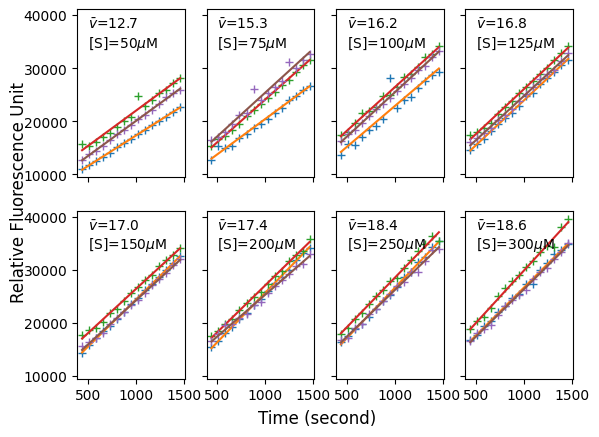

In [3]:
data = pd.read_excel('./Verify M Equation.xlsx')
start_point = 6
time = np.array(data['Time'])[start_point:]
fig,axes = plt.subplots(2,4,sharex=True,sharey=True)
res = []
c=25
for i in range(8):
    temp = []
    for j in range(ord('A'),ord('D')):
        y = data[f'{chr(j)}{i+1}'][start_point:]
        axes[i//4,i%4].plot(time,y,'+')
        k,b=np.polyfit(time,y,1)
        temp.append(k)
        axes[i//4,i%4].plot(time,k*time+b)    
    mean = np.mean(temp)
    if i<=4:
        c=c+25
    else:
        c=c+50
    axes[i//4,i%4].annotate(r'$\bar{v}$='+f'{mean:.1f}\n'+f'[S]={c}'+r'$\mu$M',xy=(500,34000))
    res.append(mean)
fig.supylabel('Relative Fluorescence Unit')
fig.supxlabel('Time (second)')

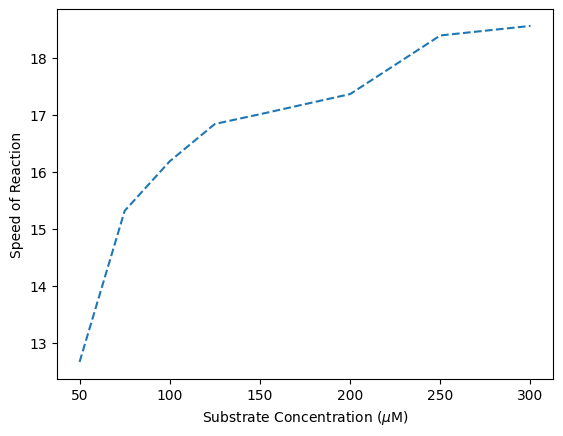

In [4]:
res = np.array(res)
sub = np.array([50, 75, 100, 125, 150, 200, 250, 300])
plt.xlabel('Substrate Concentration ($\mu$M)')
plt.ylabel('Speed of Reaction')
plt.plot(sub,res,'--')

Text(-0.03450026566982895, 0.024412080521578877, '$-\\frac{1}{K_{m}}=$-0.03450')

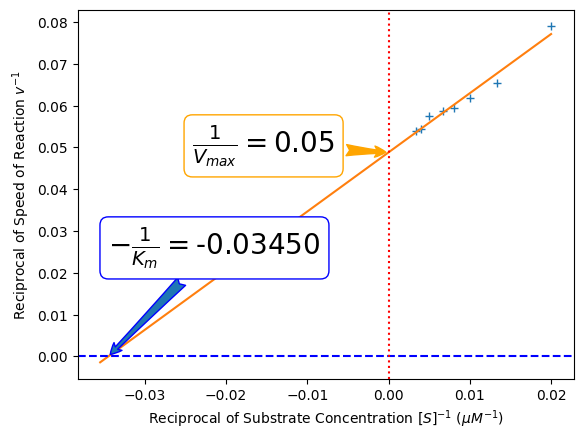

In [5]:
y=1/res
x=1/sub
plt.xlabel('Reciprocal of Substrate Concentration '+r'$[S]^{-1}$ '+r'$(\mu M^{-1})$')
plt.ylabel('Reciprocal of Speed of Reaction '+r'$v^{-1}$')
plt.plot(x,y,'+')
k,b = np.polyfit(x,y,1)
t = np.linspace(-b/k-1e-3,max(x),1000)
plt.plot(t,k*t+b)
plt.axhline(0, color='blue', linestyle='--', lw=1.5)  # Dashed blue x-axis
plt.axvline(0, color='red', linestyle=':', lw=1.5)    # Dotted red y-axis
plt.annotate(r'$\frac{1}{V_{max}}=$'+f'{b:.2f}',fontsize=20,xy=(0,b),xytext=(-b/k*0.7,b),bbox=dict(facecolor='white', edgecolor='orange', boxstyle='round,pad=0.3'),arrowprops=dict(facecolor='orange',edgecolor='orange',arrowstyle='fancy'))
plt.annotate(r'$-\frac{1}{K_{m}}=$'+f'{-b/k:.5f}',fontsize=20,xy=(-b/k,0),xytext=(-b/k,b/2),bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'),arrowprops=dict(edgecolor='blue',arrowstyle='fancy'))

# Figure out $IC_{50}$

Text(0.5, 0.01, 'Time (second)')

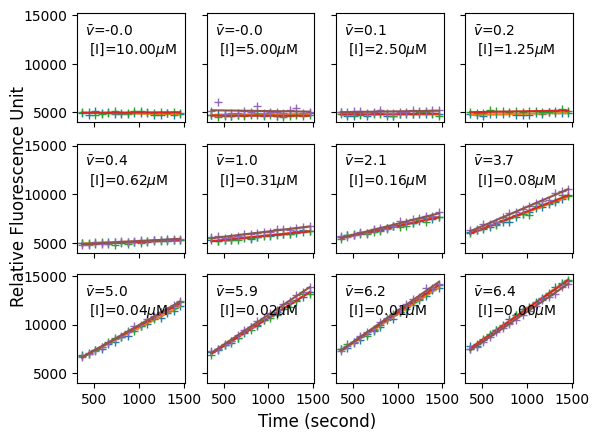

In [9]:
data = pd.read_excel('./With Inhibitor.xlsx')
start_point = 5
time = np.array(data['Time'])[start_point:]
fig,axes = plt.subplots(3,4,sharex=True,sharey=True)
res = []
c = 20
inhibitor = []
for i in range(12):
    temp = []
    for j in range(ord('A'),ord('D')):
        if i == 0 and j==ord('B'):
            continue
        if i == 3 and j==ord('A'):
            continue
        y = data[f'{chr(j)}{i+1}'][start_point:]
        axes[i//4,i%4].plot(time,y,'+')
        k,b=np.polyfit(time,y,1)
        temp.append(k)
        axes[i//4,i%4].plot(time,k*time+b)    
    mean = np.mean(temp)
    c = c/2
    inhibitor.append(c)
    axes[i//4,i%4].annotate(r'$\bar{v}$='+f'{mean:.1f}'+f'\n [I]={c:.2f}'+r'$\mu$M',xy=(400,11000))
    res.append(mean)
fig.supylabel('Relative Fluorescence Unit')
fig.supxlabel('Time (second)')

Text(0.3, 5.707487912973416, '$IC_{50}=0.095\\ \\mu M$')

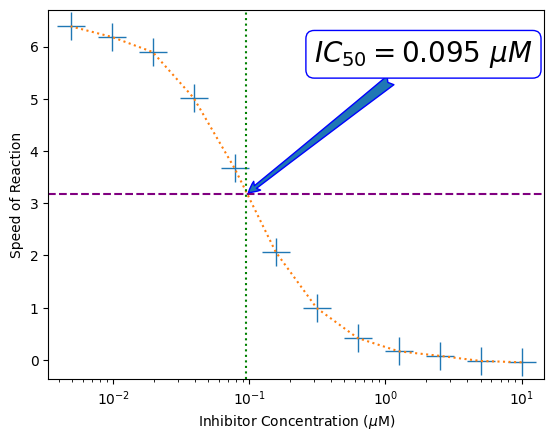

In [10]:
res = np.array(res)
plt.xlabel('Inhibitor Concentration ($\mu$M)')
plt.ylabel('Speed of Reaction')
plt.semilogx(inhibitor,res,'+',markersize=20)
plt.semilogx(inhibitor,res,':',markersize=10)
plt.axhline((max(res)+min(res))/2,linestyle='--',color='purple')
plt.axvline(0.095,linestyle=':',color='green')
plt.annotate(r'$IC_{50}=0.095\ \mu M$',fontsize=20,xy=(0.095,(max(res)+min(res))/2),xytext=(0.3,(max(res)+min(res))*0.9),bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.3'),arrowprops=dict(edgecolor='blue',arrowstyle='fancy'))